In [1]:
import numpy as np
import matplotlib.pyplot as plt

from population import Population
from util import heuristic

In [2]:
pop = Population(10)
best = pop.select_best()
evolution = []
termination = 2000

In [3]:
while termination > 0:
    pop.population = pop.generate_next_generation()
    evolution.append(pop.select_best())
    if pop.select_best().fitness == best.fitness:
        best = pop.select_best()
        termination -= 1
    else:
        best = pop.select_best()
        termination = 2000

    best = pop.select_best()

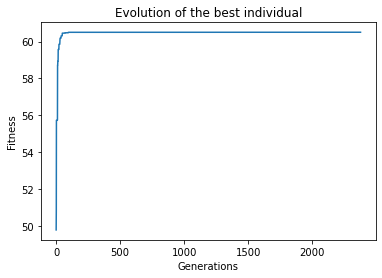

In [10]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('Evolution of the best individual')
ax.set_xlabel('Generations')
ax.set_ylabel('Fitness')

ax.plot([x.fitness for x in evolution])
# ax.plot([heuristic(*x.decode_chromosome()) for x in evolution])
plt.show()

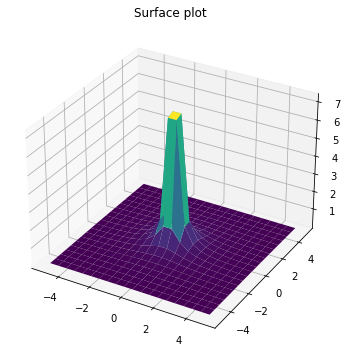

In [5]:
def f(x, y):
    x0 = np.power(np.cos(np.radians(x)) + np.sin(np.radians(y)), 2)
    x1 = np.power(x, 2) + np.power(y, 2)
    return x0 / x1

x = np.outer(np.linspace(-5, 5, 20), np.ones(20))
y = x.copy().T
z = f(x, y)
 
fig = plt.figure(figsize=(8, 6))
 
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='viridis')
ax.set_title('Surface plot')
plt.show()

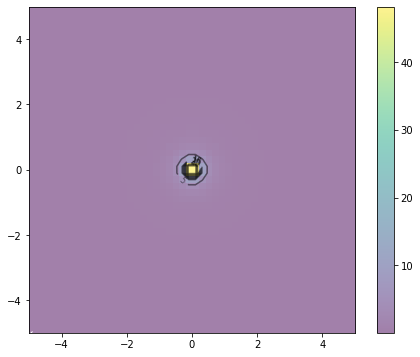

In [6]:
xlist = np.linspace(-5.0, 5.0)
ylist = np.linspace(-5.0, 5.0)
X, Y = np.meshgrid(xlist, ylist)
Z = f(X, Y)

x_min = X.ravel()[Z.argmin()]
y_min = Y.ravel()[Z.argmin()]

fig = plt.figure(figsize=(8, 6))

plt.imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis', alpha=0.5)
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
plt.colorbar()
contours = plt.contour(X, Y, Z, 10, colors='black', alpha=0.5, origin='lower')

plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

plt.show()